In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv('C:\\Users\\User\\Downloads\\major project\\clean_water_requirement_data.csv')
df.head()

,temperature,humidity,wind_speed,evapotranspiration,rainfall_pattern,soil_type,soil_moisture_levels,water_retention_capacity,drainage_properties,crop_type,crop_water_requirement,growth_stage,water_requirement
0,24.363503,49.891265,11.084976,6.743301,moderate,sandy,19.897240,35.673364,good,wheat,11.656577,vegetative,17.80
1,38.767858,46.632968,3.175424,5.133632,low,silty,19.440264,46.812501,poor,rice,5.141654,fruiting,10.58
2,33.299849,34.092313,5.526276,9.680487,low,clay,30.805983,43.495237,good,rice,5.427771,flowering,16.74
3,29.966462,68.581334,10.117569,2.970806,low,clay,5.105964,44.601767,good,rice,2.668952,seedling,4.76
4,18.900466,58.129933,7.490295,6.290708,low,sandy,38.141026,10.108229,good,soybean,3.652293,vegetative,9.54


In [3]:
X = df.drop(columns=['water_requirement']) 

In [4]:
y=df.iloc[:,-1]

In [5]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['temperature', 'humidity', 'wind_speed', 'evapotranspiration',
       'soil_moisture_levels', 'water_retention_capacity',
       'crop_water_requirement', 'water_requirement'],
      dtype='object')

In [6]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Count unique categories in each categorical column
category_counts = {col: df[col].nunique() for col in categorical_columns}

# Print the results
for col, count in category_counts.items():
    print(f"{col}: {count} unique categories")

rainfall_pattern: 3 unique categories
soil_type: 5 unique categories
drainage_properties: 3 unique categories
crop_type: 5 unique categories
growth_stage: 6 unique categories


In [7]:
print(df['soil_type'].unique()) 
print(df['rainfall_pattern'].unique())
print(df['drainage_properties'].unique())
print(df['crop_type'].unique())
print(df['growth_stage'].unique())

['sandy' 'silty' 'clay' 'peaty' 'loamy']
['moderate' 'low' 'high']
['good' 'poor' 'moderate']
['wheat' 'rice' 'soybean' 'cotton' 'maize']
['vegetative' 'fruiting' 'flowering' 'seedling' 'maturity' 'reproductive']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(16000, 12)

In [10]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categorical to numerical
    label_encoders[col] = le  # Store encoders for inverse transformation

C:\Users\User\AppData\Local\Temp\ipykernel_7676\111883450.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


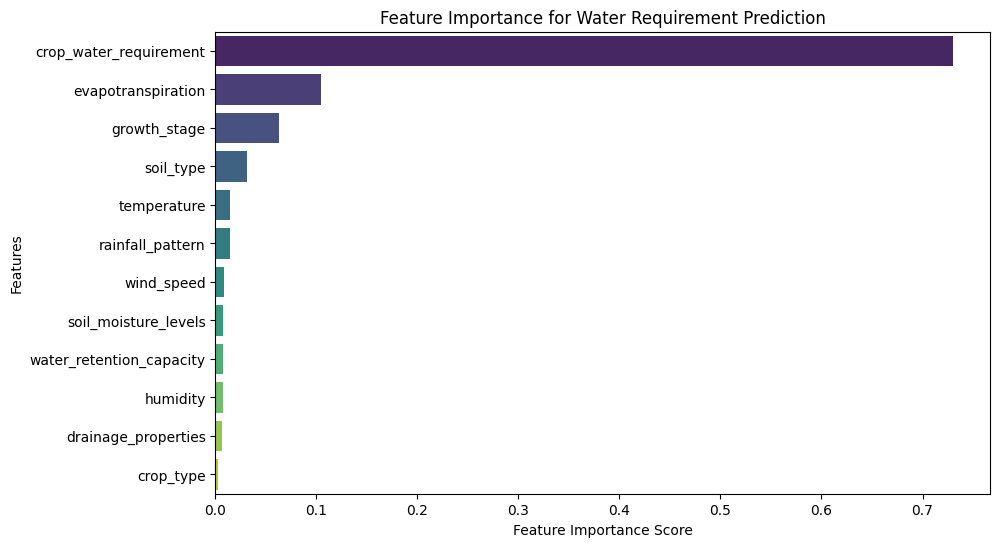

Mean Absolute Error 0.8272287948093372
Mean R Squared 0.9444194482428152
Feature Importance:
crop_water_requirement      0.730679
evapotranspiration          0.104857
growth_stage                0.063204
soil_type                   0.031183
temperature                 0.014904
rainfall_pattern            0.014499
wind_speed                  0.008801
soil_moisture_levels        0.007768
water_retention_capacity    0.007322
humidity                    0.007169
drainage_properties         0.006933
crop_type                   0.002680
dtype: float64


In [11]:
# Encode categorical features
categorical_columns = ['rainfall_pattern', 'soil_type', 'drainage_properties', 'crop_type', 'growth_stage']
df_encoded = df.copy()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df_encoded.drop(columns=['water_requirement'])  # Features
y = df_encoded['water_requirement']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature Importance Analysis
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Water Requirement Prediction")
plt.show()

# Return evaluation metrics
print("Mean Absolute Error",mae)
print("Mean R Squared",r2)
print("Feature Importance:")
print(feature_importances)

In [12]:
correlation_matrix = df.corr()
print(correlation_matrix['water_requirement'])

temperature                 0.082502
humidity                   -0.016958
wind_speed                  0.062858
evapotranspiration          0.306207
rainfall_pattern            0.089451
soil_type                   0.038873
soil_moisture_levels        0.063450
water_retention_capacity    0.063427
drainage_properties         0.038285
crop_type                   0.046013
crop_water_requirement      0.840243
growth_stage                0.095651
water_requirement           1.000000
Name: water_requirement, dtype: float64


In [16]:
# Define categorical mappings
soil_type_mapping = {'sandy': 3, 'silty': 4, 'clay': 0, 'peaty': 2, 'loamy': 1}
rainfall_pattern_mapping = {'moderate': 2, 'low': 1, 'high': 0}
drainage_properties_mapping = {'good': 0, 'poor': 2, 'moderate': 1}
crop_type_mapping = {'wheat': 4, 'rice': 2, 'soybean': 3, 'cotton': 0, 'maize': 1}
growth_stage_mapping = {'vegetative': 5, 'fruiting': 1, 'flowering': 0, 'seedling': 4, 'maturity': 2, 'reproductive': 3}

# Reverse mappings for display
reverse_mappings = {
    'growth_stage': {v: k for k, v in growth_stage_mapping.items()},
    'soil_type': {v: k for k, v in soil_type_mapping.items()},
    'rainfall_pattern': {v: k for k, v in rainfall_pattern_mapping.items()},
    'drainage_properties': {v: k for k, v in drainage_properties_mapping.items()},
    'crop_type': {v: k for k, v in crop_type_mapping.items()},
}

# Select top 5 features based on importance
top_5_features = feature_importances.index[:5].tolist()

# Store user input
user_input = {}

print("Please enter values for the following features:")

# Get input for the top 5 features
for feature in top_5_features:
    if feature in reverse_mappings:  # If it's categorical, show category names
        print(f"\nAvailable categories for {feature}:")
        for num, cat in reverse_mappings[feature].items():
            print(f"{num}: {cat}")

        user_value = input(f"Enter the number corresponding to {feature}: ").strip()
        if user_value.isdigit() and int(user_value) in reverse_mappings[feature]:
            user_input[feature] = int(user_value)
        else:
            print(f"Invalid choice! Defaulting to first category: {reverse_mappings[feature][0]}")
            user_input[feature] = 0  # Default to first category
    else:  # Numerical input
        user_input[feature] = float(input(f"Enter value for {feature}: "))

# Ask user if they want to add extra features
extra_features = []
print("\nDo you want to add more features? (yes/no)")
choice = input().strip().lower()

if choice == "yes":
    remaining_features = [f for f in feature_importances.index if f not in top_5_features]
    print("\nAvailable additional features:")
    for i, feature in enumerate(remaining_features, 1):
        print(f"{i}. {feature}")
    
    selected_indices = input("Enter the numbers of features to add (comma-separated): ")
    selected_indices = [int(i.strip()) - 1 for i in selected_indices.split(",")]

    for i in selected_indices:
        feature = remaining_features[i]
        if feature in reverse_mappings:  # If categorical, show category names
            print(f"\nAvailable categories for {feature}:")
            for num, cat in reverse_mappings[feature].items():
                print(f"{num}: {cat}")

            user_value = input(f"Enter the number corresponding to {feature}: ").strip()
            if user_value.isdigit() and int(user_value) in reverse_mappings[feature]:
                user_input[feature] = int(user_value)
            else:
                print(f"Invalid choice! Defaulting to first category: {reverse_mappings[feature][0]}")
                user_input[feature] = 0  # Default to first category
        else:  # If numerical
            user_input[feature] = float(input(f"Enter value for {feature}: "))

# Ask user for the land area
land_area = float(input("\nEnter the area of the land in square meters (m²): "))

# Prepare input for model
final_features = top_5_features + extra_features
input_data = np.array([user_input[feature] for feature in final_features]).reshape(1, -1)

# Ensure all required features are present (fill missing ones with mean)
model_features = X.columns
final_input = np.zeros((1, len(model_features)))
for i, feature in enumerate(model_features):
    if feature in user_input:
        final_input[0, i] = user_input[feature]
    else:
        final_input[0, i] = X_train[feature].mean()  # Fill missing with mean

# Make prediction
prediction = model.predict(final_input)
print(f"\n✅ Predicted Water Requirement: {prediction[0]:.2f} mm/day")

# Convert the water requirement to liters based on the land area
total_water_needed = prediction[0] * land_area
print(f"✅ Total Water Needed: {total_water_needed:.2f} liters/day")

Please enter values for the following features:


Enter value for crop_water_requirement:  11
Enter value for evapotranspiration:  5



Available categories for growth_stage:
5: vegetative
1: fruiting
0: flowering
4: seedling
2: maturity
3: reproductive


Enter the number corresponding to growth_stage:  0



Available categories for soil_type:
3: sandy
4: silty
0: clay
2: peaty
1: loamy


Enter the number corresponding to soil_type:  2
Enter value for temperature:  36



Do you want to add more features? (yes/no)


 no

Enter the area of the land in square meters (m²):  600



✅ Predicted Water Requirement: 15.86 mm/day
✅ Total Water Needed: 9513.09 liters/day


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
